In [2]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/nursnaaz/DataScienceMasterclass/main/04%20-%20Data%20Preprocessing/student_assignment.csv',sep=',')

In [5]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [6]:
data1=data

In [7]:
data.describe()

,Age,Income,Num Children,Temperature,Rating
count,103.000000,104.000000,101.000000,104.000000,104.000000
mean,52.932039,58456.756442,3.059406,38.399038,3.295192
std,66.249567,22150.934058,4.046781,2.083010,1.448426
min,18.000000,20955.370000,0.000000,35.200000,-3.200000
25%,31.500000,40065.965000,2.000000,36.700000,2.600000
50%,42.000000,58014.560000,3.000000,38.400000,3.400000
75%,53.500000,74489.015000,4.000000,39.925000,4.100000
max,511.000000,99072.180000,40.000000,41.900000,10.900000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [9]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [12]:
data.duplicated().sum()

3

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data['Age'].mean()

53.31

In [15]:
data['Age'].median()

42.0

<Axes: >

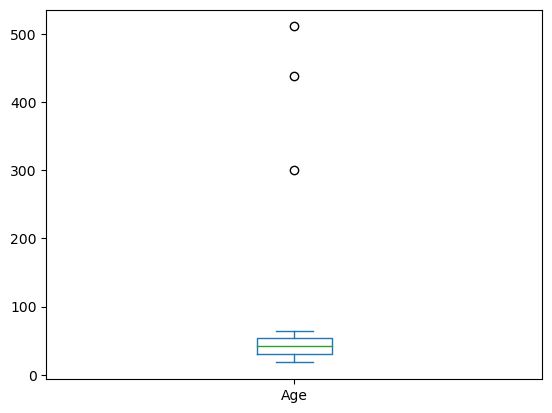

In [17]:
data['Age'].plot(kind='box')

In [30]:
data2=data1

In [31]:
#removing Age outlier
data1=data1[data1['Age']>100]

<Axes: >

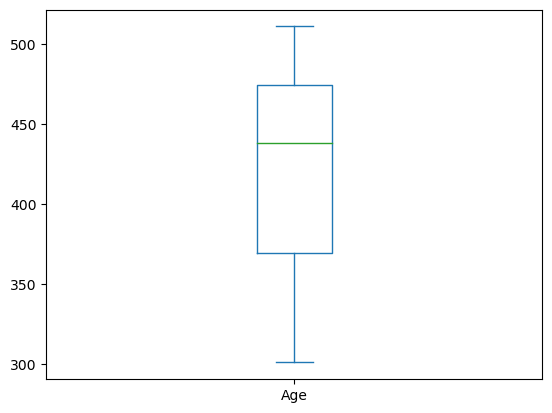

In [32]:
data1['Age'].plot(kind='box')

In [39]:
data1.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    1
Temperature     0
Rating          0
dtype: int64

In [40]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data1[col_name].quantile(0.25)
    q3 = data1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data1.loc[(data1[col_name] < low) | (data1[col_name] > high), col_name])
    

Age
Outliers =  Series([], Name: Age, dtype: float64)
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  Series([], Name: Num Children, dtype: float64)
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [41]:
data1_cat=data1.select_dtypes(exclude=np.number)

In [37]:
data1['Is Student'].replace({'True':1,'False':0},inplace=True)

C:\Users\yamin\AppData\Local\Temp\ipykernel_15460\1802347250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Is Student'].replace({'True':1,'False':0},inplace=True)


In [38]:
data1

,Age,Income,Is Student,Num Children,Temperature,Rating
7,511.0,59721.22,1,0.0,41.9,1.2
19,301.0,39598.07,1,NaN,40.0,3.3
47,438.0,87051.70,0,3.0,37.3,2.7


In [45]:
data1.reset_index()

,index,Age,Income,Is Student,Num Children,Temperature,Rating
0,7,511.0,59721.22,1,0.0,41.9,1.2
1,19,301.0,39598.07,1,NaN,40.0,3.3
2,47,438.0,87051.70,0,3.0,37.3,2.7


In [46]:
data1.reset_index().drop(columns='index')

,Age,Income,Is Student,Num Children,Temperature,Rating
0,511.0,59721.22,1,0.0,41.9,1.2
1,301.0,39598.07,1,NaN,40.0,3.3
2,438.0,87051.70,0,3.0,37.3,2.7


In [49]:
data1['Age']=data1['Age'].astype('int')

C:\Users\yamin\AppData\Local\Temp\ipykernel_15460\4098230877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age']=data1['Age'].astype('int')


In [54]:
data1.dtypes

Age               int32
Income          float64
Is Student        int64
Num Children    float64
Temperature     float64
Rating          float64
dtype: object

In [56]:
data1['Num Children']=data1['Num Children'].fillna(data1['Num Children'].mode()[0])

C:\Users\yamin\AppData\Local\Temp\ipykernel_15460\4235555608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Num Children']=data1['Num Children'].fillna(data1['Num Children'].mode()[0])


In [59]:
data1['Num Children']=data1['Num Children'].astype('int')

C:\Users\yamin\AppData\Local\Temp\ipykernel_15460\1594463586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Num Children']=data1['Num Children'].astype('int')


In [60]:
data1

,Age,Income,Is Student,Num Children,Temperature,Rating
7,511,59721.22,1,0,41.9,1.2
19,301,39598.07,1,0,40.0,3.3
47,438,87051.70,0,3,37.3,2.7


In [61]:
data1.reset_index().drop(columns='index')

,Age,Income,Is Student,Num Children,Temperature,Rating
0,511,59721.22,1,0,41.9,1.2
1,301,39598.07,1,0,40.0,3.3
2,438,87051.70,0,3,37.3,2.7
